In [46]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [7]:
#load dataset

df = pd.read_csv("abalone.csv")
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [8]:
#check the data-shape

df.shape

(4177, 9)

In [9]:
#checking for any null values in data

df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [10]:
#check data statatical purpose

#as we see there are some outliers there, in describe-min column, weight is .002, height 0000 so practically it is not acceptable.


df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [12]:
df.value_counts("Sex")

Sex
M    1528
I    1342
F    1307
dtype: int64

In [13]:
df.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [14]:
label=LabelEncoder()
df['Sex']=label.fit_transform(df['Sex'])

df['Sex']=df['Sex'].astype('float')

In [15]:
df.corr()

# here we can see that rings have no relation with Sex. Apart from it,it have relation with other parameters.

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


[Text(0.5, 1.0, 'Gender-Rings comparision')]

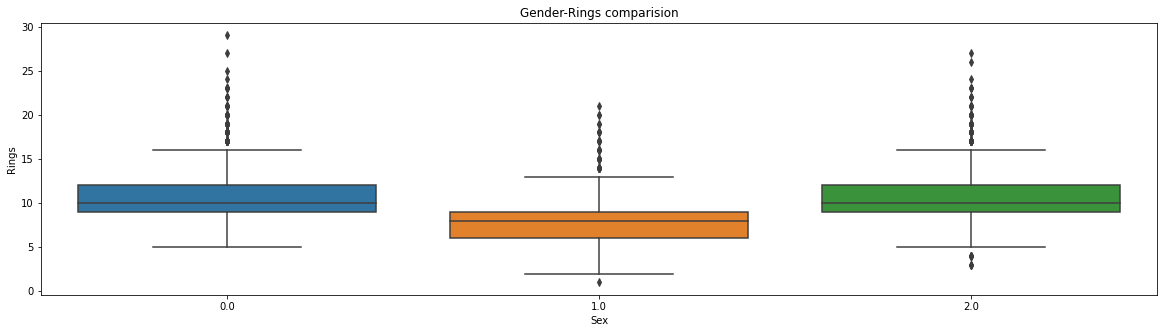

In [16]:
plt.figure(figsize = (20, 5)) 
sns.boxplot(data = df, x = df['Sex'], y = df['Rings']).set(title='Gender-Rings comparision')

#0.0 = Female , 1.0= Infant and 2.0 = Male. so here we can see that there are many outliers are their and infant have comparitively less avg rings.

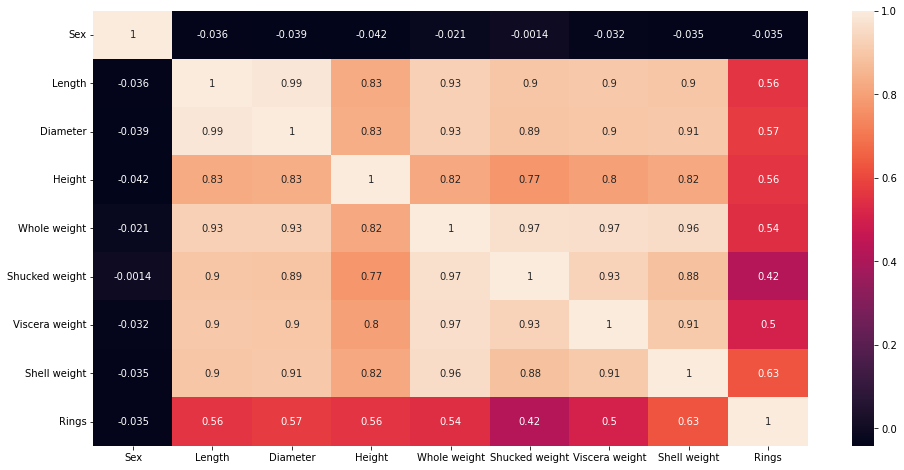

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot = True,linecolor="black")

#here, we can see that apart from gender, all parameters are relatable and we should conclude it for Ml.

<Figure size 144x72 with 0 Axes>

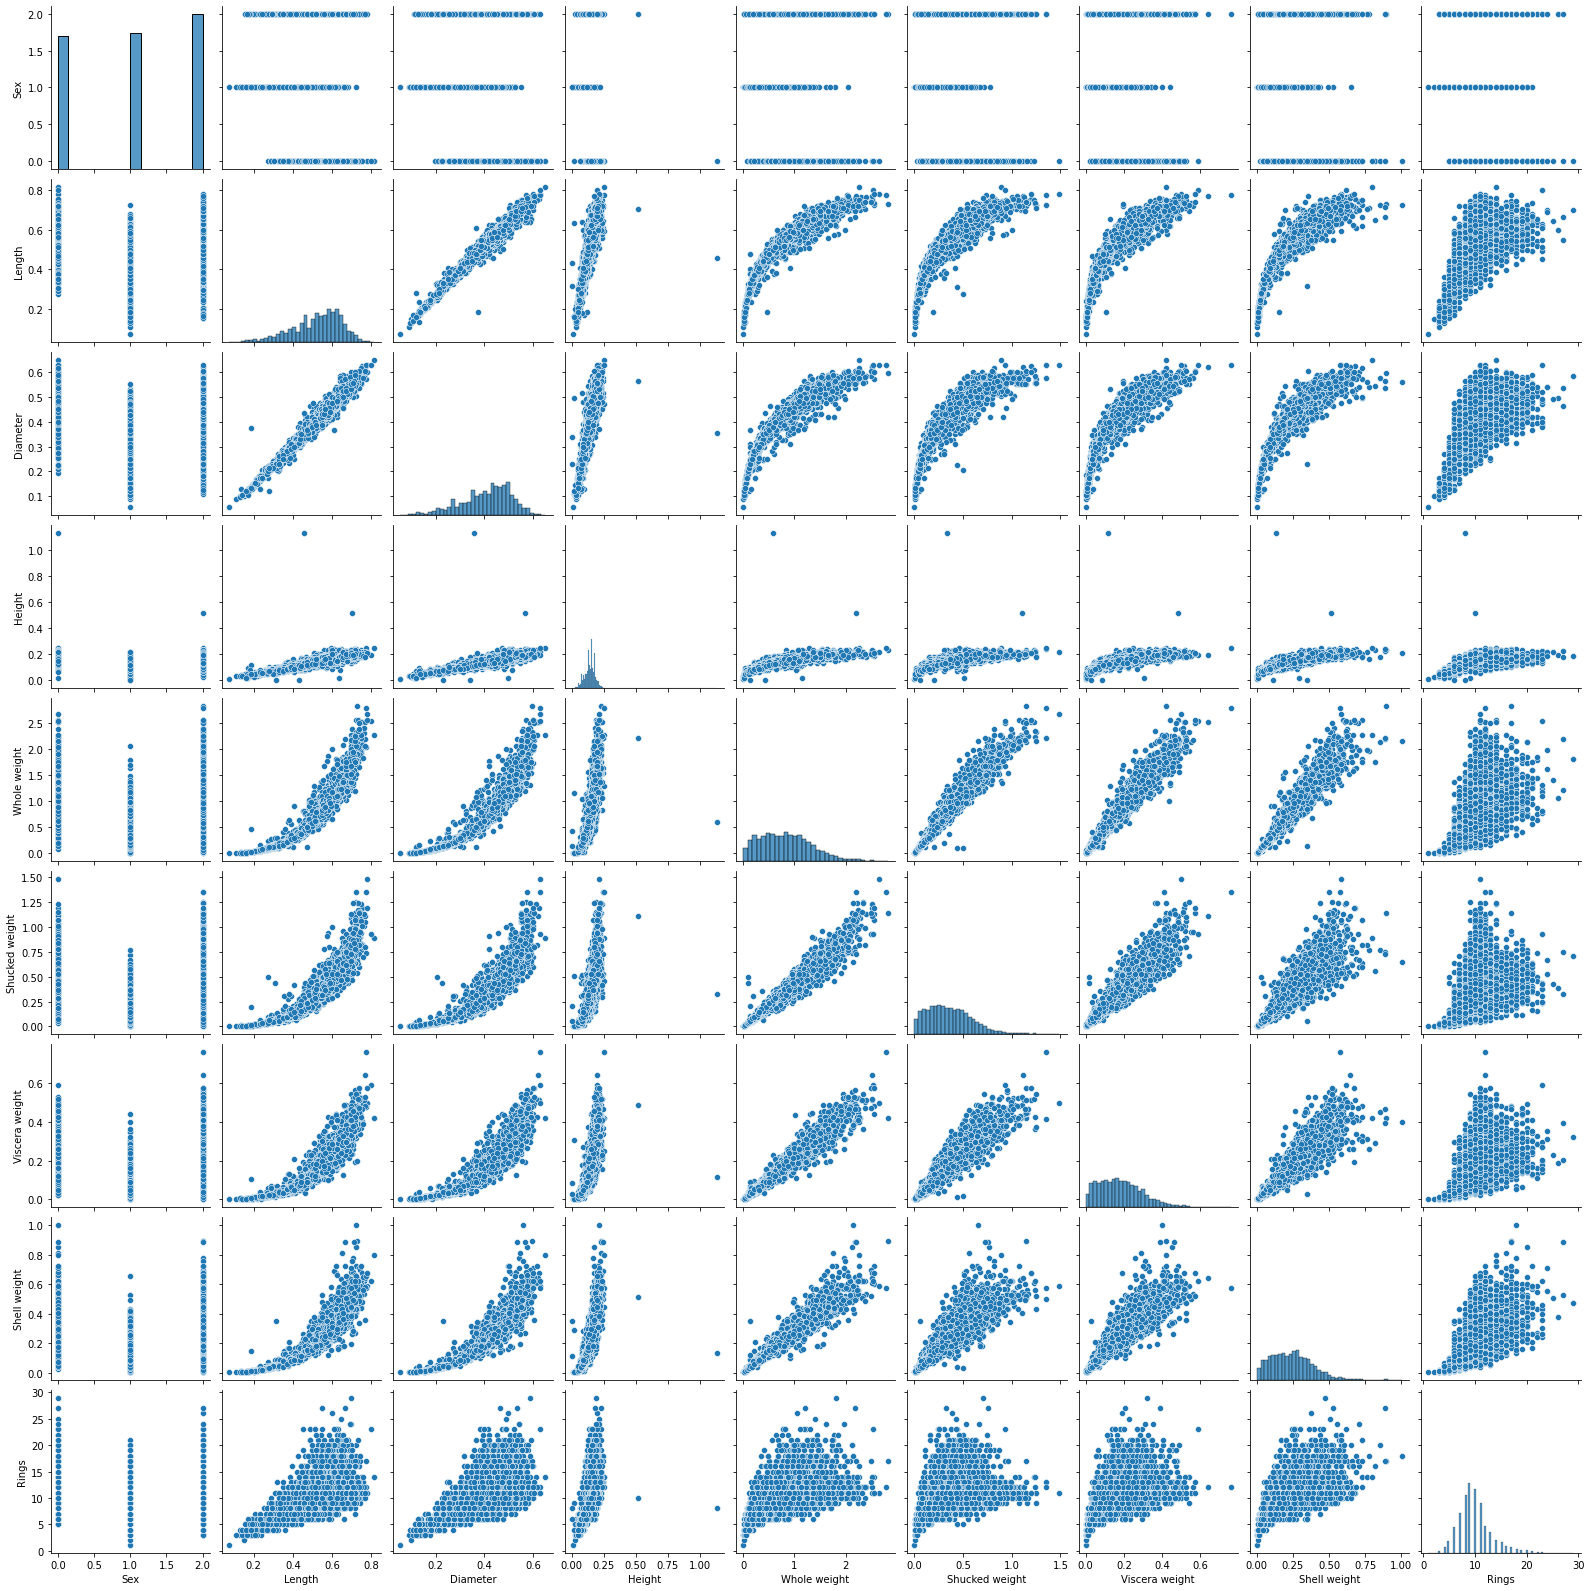

In [18]:
#checking corelation and outliers, 
plt.figure(figsize=(2,1))
sns.pairplot(df)

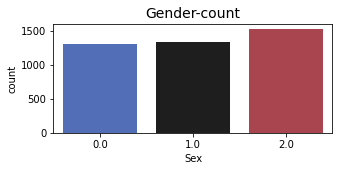

In [19]:
  col = df['Sex']
  
  plt.figure(figsize=(5,2))
  sns.countplot(x=col , data = df ,palette='icefire')
  plt.title("Gender-count", fontsize=14)
  plt.show()
 


In [20]:
from scipy.stats import zscore
di=df.select_dtypes('float')
z_score=zscore(di)
print(di.shape)
df_1=df.loc[(z_score<3).all(axis=1)]
print(df_1.shape)

(4177, 8)
(4103, 9)


In [21]:
df_1.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [22]:
df_1.skew()

Sex              -0.093207
Length           -0.691868
Diameter         -0.654787
Height           -0.316168
Whole weight      0.319345
Shucked weight    0.444865
Viscera weight    0.425574
Shell weight      0.351692
Rings             1.099551
dtype: float64

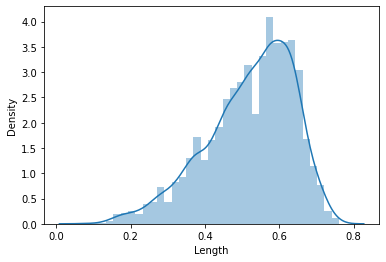

In [23]:
sns.distplot(df_1['Length'])
#left skewed


In [24]:
from scipy.stats import boxcox
for col in di:
    if df_1[col].skew()>=.6:
        df_1[col]=np.cbrt(df[col]) ## For Right skewed data we use log,square root,cube root transformation
    if df_1[col].skew()<=-.6:
        df_1[col]=np.power(df_1[col],2)

In [25]:
df_1.skew()

Sex              -0.093207
Length           -0.147507
Diameter         -0.097940
Height           -0.316168
Whole weight      0.319345
Shucked weight    0.444865
Viscera weight    0.425574
Shell weight      0.351692
Rings             1.099551
dtype: float64

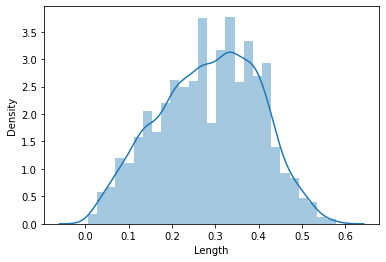

In [26]:
sns.distplot(df_1['Length'])

After doing EDA, we are on conclusion where we can drop Sex column as it is not relatable much. skewed data fixed using CBRT and power transform. We have no null values so we can proceed it easily and outlieres also removed using z-score method

In [27]:
df_1.shape

(4103, 9)

In [28]:
cols = ['Length','Height','Diameter','Whole weight','Shucked weight','Viscera weight','Shell weight']

Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

df1 = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df1.shape)

(4024, 9)


In [29]:
df1.describe()

# now we can see min height of 0000 and lengh of .0020 like outliers removed so our data is pretty good

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,1.048459,0.525002,0.408625,0.139266,0.812324,0.351824,0.177475,0.234339,9.952783
std,0.823401,0.110734,0.091935,0.035703,0.447888,0.201651,0.101493,0.126817,3.123167
min,0.000000,0.205000,0.155000,0.040000,0.042500,0.017000,0.000500,0.013000,3.000000
25%,0.000000,0.455000,0.350000,0.115000,0.448500,0.189500,0.095000,0.132000,8.000000
50%,1.000000,0.540000,0.425000,0.140000,0.795500,0.334500,0.169500,0.230000,9.000000
75%,2.000000,0.610000,0.480000,0.165000,1.134500,0.494000,0.247000,0.320500,11.000000
max,2.000000,0.760000,0.600000,0.240000,2.130000,0.960000,0.492000,0.625000,29.000000


In [30]:
df1.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [31]:
df1 = df1.drop(['Sex'], axis = 1)

In [32]:
df1.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


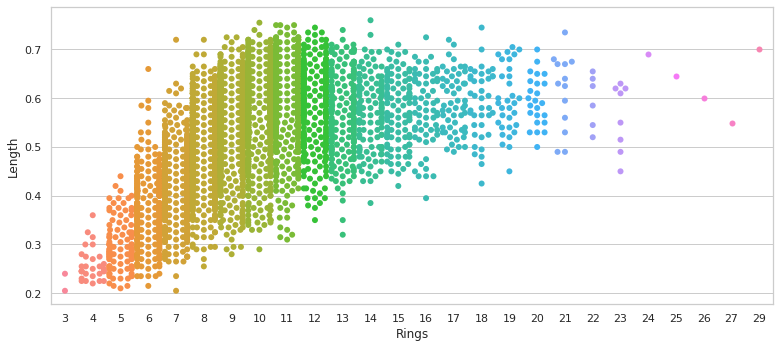

In [33]:
plt.rcParams["figure.figsize"] = [11,5]
plt.rcParams["figure.autolayout"] = True

sns.set_theme(style="whitegrid")
ax = sns.swarmplot(x="Rings", y="Length", data=df1,size =6)

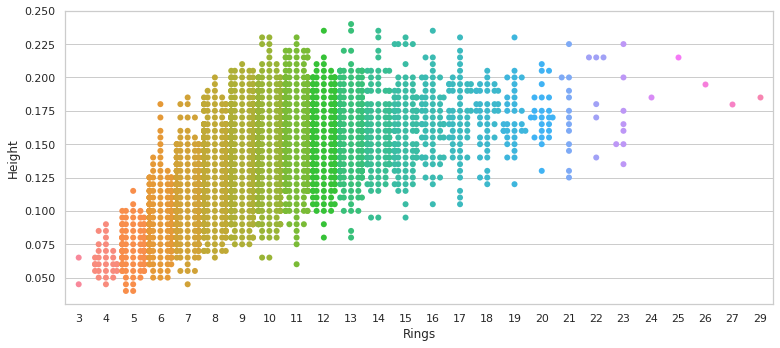

In [34]:
plt.rcParams["figure.figsize"] = [11,5]
plt.rcParams["figure.autolayout"] = True

sns.set_theme(style="whitegrid")
ax = sns.swarmplot(x="Rings", y="Height", data=df1,size =6)

In [35]:
df1.head(10)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [36]:

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4024 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4024 non-null   float64
 1   Diameter        4024 non-null   float64
 2   Height          4024 non-null   float64
 3   Whole weight    4024 non-null   float64
 4   Shucked weight  4024 non-null   float64
 5   Viscera weight  4024 non-null   float64
 6   Shell weight    4024 non-null   float64
 7   Rings           4024 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 442.9 KB


In [37]:
X=df1.drop(['Rings'],axis=1)
y=df1[['Rings']]	

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [39]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(regressor.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [40]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 288, 377, 466, 555, 644, 733, 822, 911, 1000]}


In [41]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
regressor = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
regressor_random = RandomizedSearchCV(estimator = regressor,
                                      param_distributions = random_grid,
                                      n_iter = 20,
                                      cv = 3,
                                      verbose=2,
                                      random_state=42,)
# Fit the random search model
regressor_random.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   1.6s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.9s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=377; total time=   1.6s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=377; total time=   1.6s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=377; total time=   1.7s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=3

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 288, 377, 466,
                                                         555, 644, 733, 822,
                                                         911, 1000]},
                   random_state=42, verbose=2)

In [42]:
regressor_random.best_params_

{'bootstrap': True,
 'max_depth': 50,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 200}

In [43]:
def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test).reshape(805,1)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error= ',(np.mean(errors)))
    print('Accuracy = ',accuracy)
    print("MAPE= ",mape)
    return accuracy
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Average Error=  Rings    1.677764
dtype: float64
Accuracy =  Rings    83.635351
dtype: float64
MAPE=  Rings    16.364649
dtype: float64


In [51]:
import pickle

model =RandomForestRegressor(n_estimators = 10, random_state = 42)

model.fit(X_train, y_train)

# save the model to disk

filename = 'finalized_model.sav'

pickle.dump(model, open(filename, 'wb'))

In [52]:
loaded_model = pickle.load(open(filename, 'rb'))

result = loaded_model.score(X_test, y_test)

print(result)

0.45113924165512065


In [53]:
# I am bit confused in how to save best model